# CIS 4526 Sp24 HomeWork 3

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [5]:
cloud_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'cloudy' in i]
rain_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'rain' in i]
sunrise_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'sunrise' in i]
sunshine_set = ['weather_data/{}'.format(i) for i in os.listdir('weather_data') if 'shine' in i]

In [6]:
cloud_set

['weather_data/cloudy126.jpg',
 'weather_data/cloudy132.jpg',
 'weather_data/cloudy23.jpg',
 'weather_data/cloudy37.jpg',
 'weather_data/cloudy250.jpg',
 'weather_data/cloudy244.jpg',
 'weather_data/cloudy278.jpg',
 'weather_data/cloudy293.jpg',
 'weather_data/cloudy287.jpg',
 'weather_data/cloudy286.jpg',
 'weather_data/cloudy292.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy245.jpg',
 'weather_data/cloudy251.jpg',
 'weather_data/cloudy36.jpg',
 'weather_data/cloudy22.jpg',
 'weather_data/cloudy133.jpg',
 'weather_data/cloudy127.jpg',
 'weather_data/cloudy131.jpg',
 'weather_data/cloudy125.jpg',
 'weather_data/cloudy119.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy20.jpg',
 'weather_data/cloudy247.jpg',
 'weather_data/cloudy253.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy290.jpg',
 'weather_data/cloudy9.jpg',
 'weather_data/cloudy291.jpg',
 'weather_data/cloudy8.jpg',
 'weather_data/cloudy285.jpg',
 'weather_data/cloudy252.jpg',
 'weather_data/clo

In [7]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [8]:
cloud_set

['weather_data/cloudy223.jpg',
 'weather_data/cloudy217.jpg',
 'weather_data/cloudy208.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy47.jpg',
 'weather_data/cloudy271.jpg',
 'weather_data/cloudy85.jpg',
 'weather_data/cloudy177.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy24.jpg',
 'weather_data/cloudy180.jpg',
 'weather_data/cloudy192.jpg',
 'weather_data/cloudy142.jpg',
 'weather_data/cloudy293.jpg',
 'weather_data/cloudy201.jpg',
 'weather_data/cloudy199.jpg',
 'weather_data/cloudy94.jpg',
 'weather_data/cloudy269.jpg',
 'weather_data/cloudy213.jpg',
 'weather_data/cloudy266.jpg',
 'weather_data/cloudy38.jpg',
 'weather_data/cloudy261.jpg',
 'weather_data/cloudy288.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy174.jpg',
 'weather_data/cloudy193.jpg',
 'weather_data/cloudy278.jpg',
 'weather_data/cloudy101.jpg',
 'weather_data/cloudy84.jpg',
 'weather_data/cloudy146.jpg',
 'weather_data/cloudy119.jpg',
 'weather_data/cloudy182.jpg',
 'weather_data/

In [9]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[150:] + sunshine_set[150:]

In [10]:
train_set

['weather_data/cloudy223.jpg',
 'weather_data/cloudy217.jpg',
 'weather_data/cloudy208.jpg',
 'weather_data/cloudy279.jpg',
 'weather_data/cloudy47.jpg',
 'weather_data/cloudy271.jpg',
 'weather_data/cloudy85.jpg',
 'weather_data/cloudy177.jpg',
 'weather_data/cloudy34.jpg',
 'weather_data/cloudy24.jpg',
 'weather_data/cloudy180.jpg',
 'weather_data/cloudy192.jpg',
 'weather_data/cloudy142.jpg',
 'weather_data/cloudy293.jpg',
 'weather_data/cloudy201.jpg',
 'weather_data/cloudy199.jpg',
 'weather_data/cloudy94.jpg',
 'weather_data/cloudy269.jpg',
 'weather_data/cloudy213.jpg',
 'weather_data/cloudy266.jpg',
 'weather_data/cloudy38.jpg',
 'weather_data/cloudy261.jpg',
 'weather_data/cloudy288.jpg',
 'weather_data/cloudy284.jpg',
 'weather_data/cloudy174.jpg',
 'weather_data/cloudy193.jpg',
 'weather_data/cloudy278.jpg',
 'weather_data/cloudy101.jpg',
 'weather_data/cloudy84.jpg',
 'weather_data/cloudy146.jpg',
 'weather_data/cloudy119.jpg',
 'weather_data/cloudy182.jpg',
 'weather_data/

In [11]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

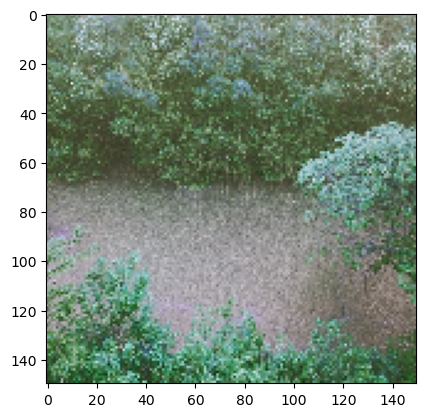

In [12]:
# Display some images
idx = 200
image = train_set[idx]
#image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

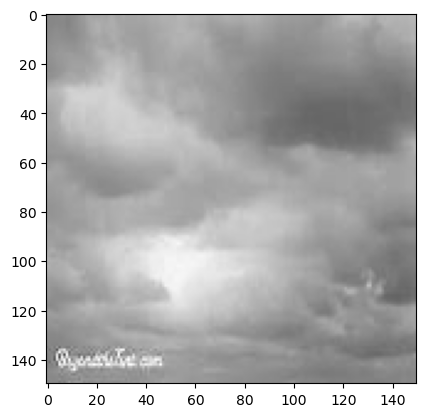

In [13]:
# Display some images
idx = 13
image = train_set[idx]
#image = "data/weather_data/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [14]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  weather_data/shine131.jpg


In [15]:
X_train[1].shape

(150, 150, 3)

<Axes: ylabel='count'>

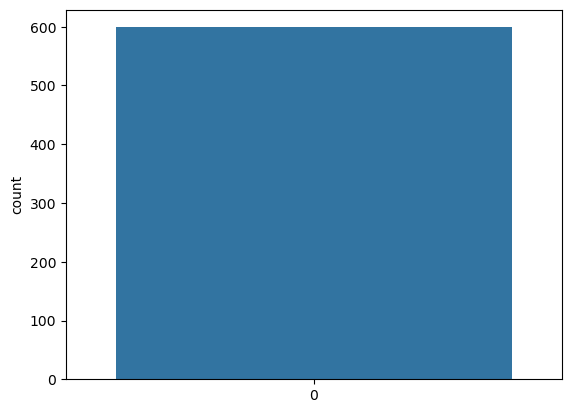

In [18]:
sns.countplot(y_train)

In [19]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
def check_zero(arr):
    for i in range(len(arr)):
        if arr[i][0] == 0:
            return True
    return False
check_zero(y_train)

True

[0. 1. 0. 0. 0.]


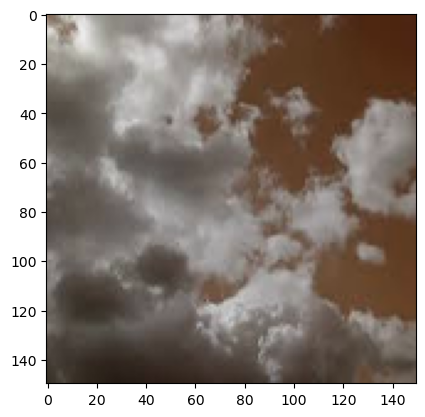

In [27]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [80]:
# Define your model here
from keras.models import Sequential, Model
from keras.layers import Dense

Model = Sequential()

# ...
# 13.) Model Summary
#print(model.summary())


In [81]:
# Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead
# of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

In [82]:
# 14.) Compile and Train the Model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), ....)

### Plot learning Curves

***Type your code here***

In [83]:
# Plot Accuracy Over Training Period

### Evaluating the model out-of-sample

In [84]:
# Type your code here
#test_loss, test_acc = model.evaluate(X_test, y_test)
#print(f"Test accuracy: {test_acc:.3f}")

### Comment on your results